# Image Compression with K-Means Algorithm

## Importations

In [4]:
import os

import numpy as np
from sklearn.cluster import KMeans


from tqdm import tqdm

from PIL import Image
import matplotlib.pyplot as plt

## Body

### Opening and Showing Image

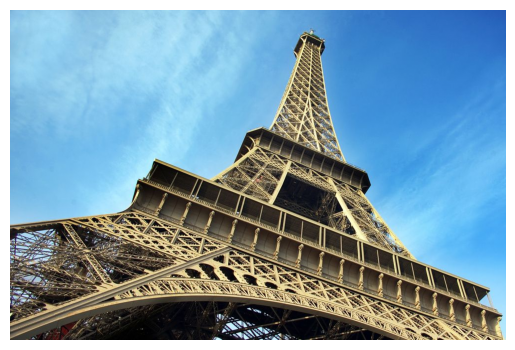

In [100]:
image = Image.open(r'./Image/eiffel.jpg')
image = np.array(image) / 255       # Normalization

plt.imshow(image)
plt.axis('off')
plt.show()

In [52]:
print(f"Shape of the image is : {image.shape}")

Shape of the image is : (666, 1000, 3)


### Getting the Color Space of the image
We convert tensor of shape $(H, W, Channel)$ to $(H * W, Channel)$ where each indek_values corresponds to the $i_{th}$ pik_valuesel's RGB values

In [59]:
image_color_space = image.reshape(image.shape[0] * image.shape[1], 3) 

In [62]:
image_color_space.shape

(666000, 3)

#### Just for fun: How does the image color space look in 3d space

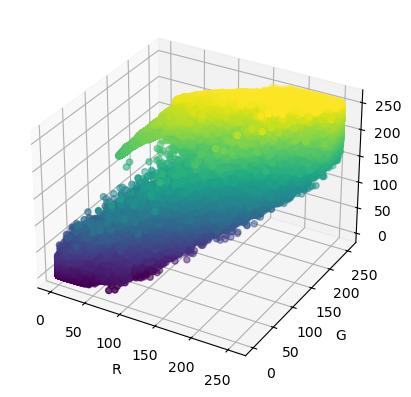

In [103]:
R = image_color_space[:,0] * 255
G = image_color_space[:,1] * 255
B = image_color_space[:,2] * 255

fig = plt.figure()
ak_values = fig.add_subplot(projection="3d")

ax.scatter(R, G, B, c=B, cmap="viridis", marker="o")
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

plt.show()

### Applying K-means on `image_color_space` for Different Values of K

In [126]:
k_values = [2, 4, 8, 16, 32]
results = {k:{'comp image':None, 'size': None, 'mask': None} for k in k_values}

In [128]:
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(image_color_space)
    
    pixels = kmeans.cluster_centers_[kmeans.labels_]
    comp_image = pixels.reshape(image.shape[0], image.shape[1], 3)
    
    results[k]['comp image'] = comp_image.copy()
    results[k]['mask'] = kmeans.labels_.reshape(image.shape[0], image.shape[1])

100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


## Results

### Compressed Images w.r.t $k$

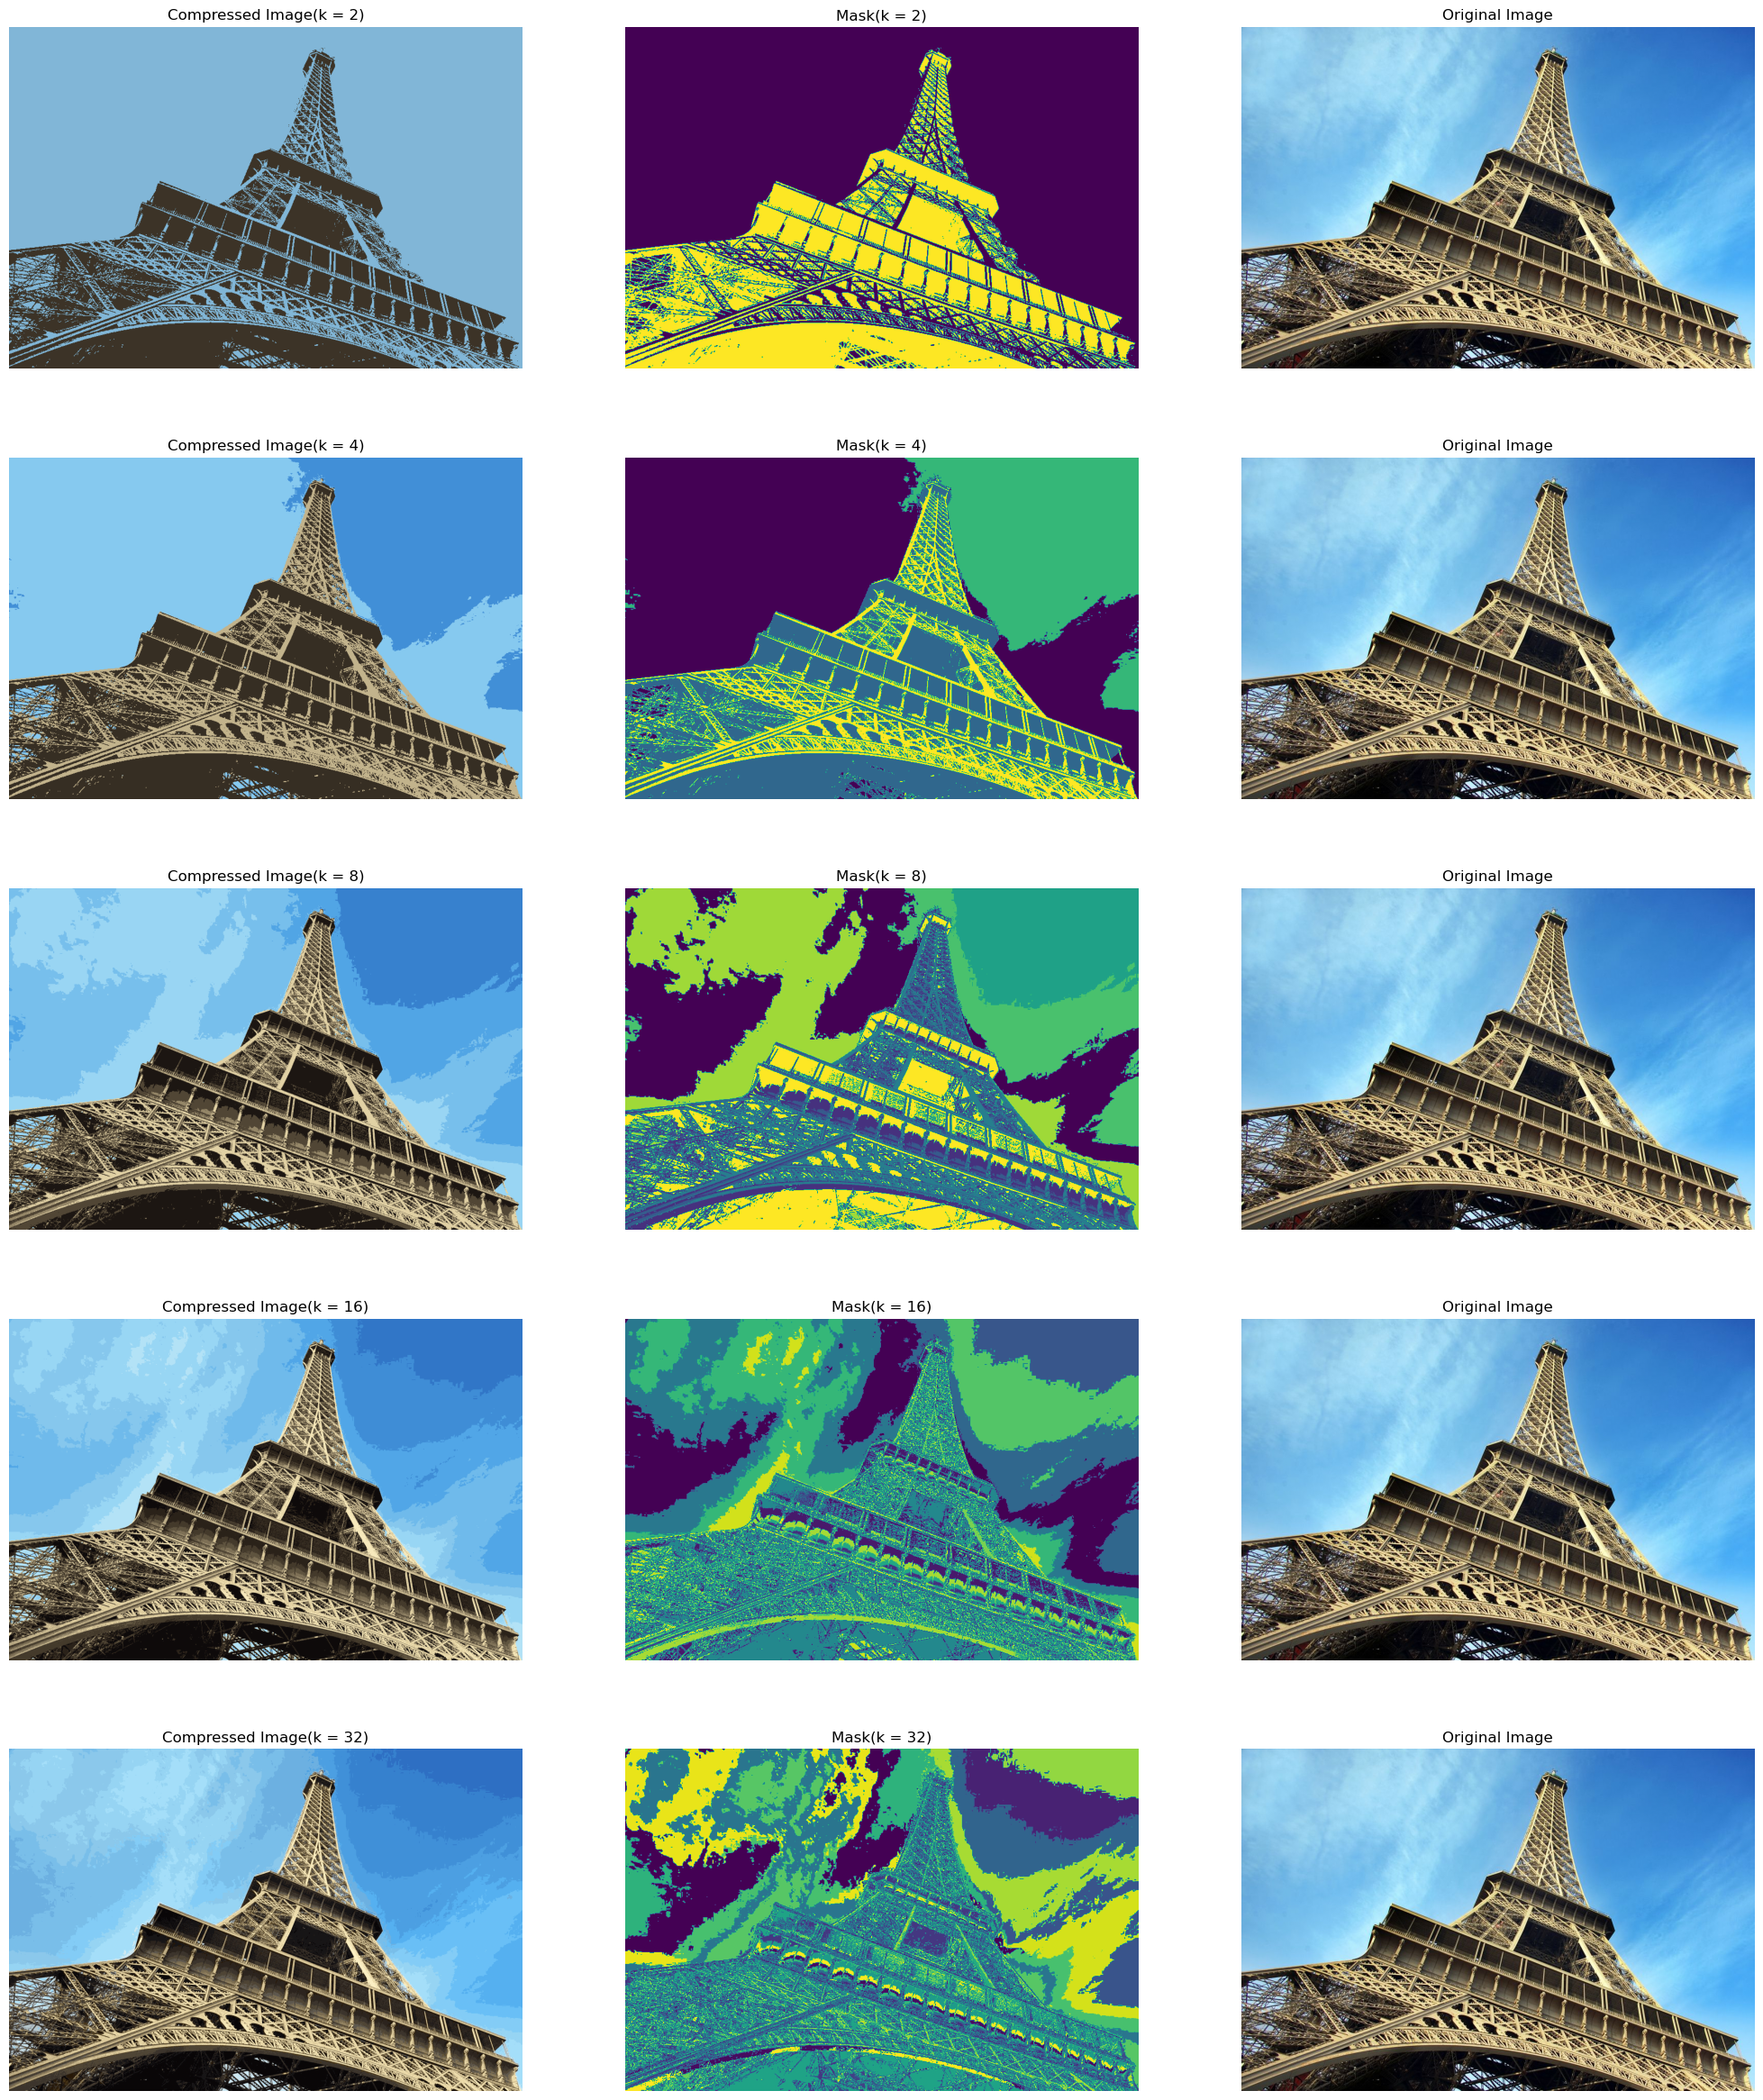

In [143]:
fig, axes = plt.subplots(5, 3, figsize=(25, 30))

i = 0
for k, res in results.items():
    
    # Compressed Image: 1st column
    img = res['comp image']
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_ylabel(f"K = {k}")
    
    # Mask Image: 2nd column
    mask = res['mask']
    axes[i, 1].imshow(mask)
    axes[i, 1].axis('off')
    
    # Original image: 3rd column
    axes[i, 2].imshow(image)
    axes[i, 2].axis('off')
    
    axes[i, 0].set_title(f'Compressed Image(k = {k})')
    axes[i, 1].set_title(f'Mask(k = {k})')
    axes[i, 2].set_title(f'Original Image')

    
    i += 1



plt.show()

### Image's sizes w.r.t. $k$

#### Saving Images

In [165]:
for k, res in results.items():
    img = (res['comp image'] * 255).astype(np.uint8)
    cImage = Image.fromarray(img)
    cImage.save(rf'./Image/k={k}_Compressed_Image.jpg', 'JPEG')

#### Measuring Size

In [171]:
for k in k_values:
    results[k]['size'] = os.path.getsize(rf'./Image/k={k}_Compressed_Image.jpg') / 1024

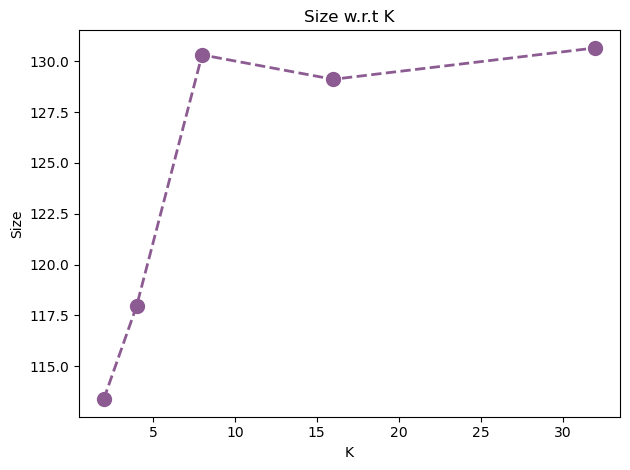

In [186]:
k_values = [2, 4, 8, 16, 32]
sizes = [results[k]['size'] for k in k_values]

plt.plot(k_values, sizes, color='#8c5b92', linewidth=2, linestyle='--', marker='o', markersize=10)

plt.title('Size w.r.t K')
plt.xlabel('K')
plt.ylabel('Size')

plt.tight_layout()
plt.show()
